In [2]:
%pylab inline
from pomegranate import *

Populating the interactive namespace from numpy and matplotlib


### Distributions¶


The distribution is the simplest unit of probabilistic modelling. You are saying that all of your data are realizations of the same stationary underlying distribution. This is a good fit for many types of simple data where each instance is a fixed feature size and independant of all other instances. Here is a full list of the distributions currently supported:


In [3]:
d = NormalDistribution( 0, 1 ) # The normal distribution

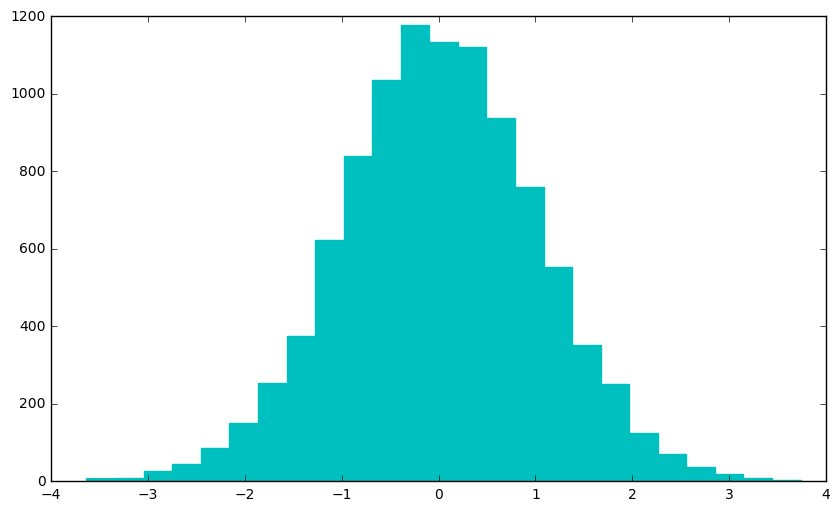

In [4]:
plt.figure( figsize=(10,6) )
d.plot( n=10000, edgecolor='c', facecolor='c', alpha=1, bins=25 )

In [5]:
print (d.log_probability(  2 ))
print (d.log_probability( -2 ))

-2.9189385332042734
-2.9189385332042734


The log probability for both are the same, which makes sense since they're both the same distance from 0. Calculating log probabilities are more efficient than calculating probabilities, and usually lead to more efficient downstream algorithms, and so are the only option provided.

In [9]:
import timeit
from scipy.stats import norm

print ("scipy norm: {}s".format( timeit.timeit( "norm.logpdf(2, 0, 1)", setup="from scipy.stats import norm", number=10000 ) ))
print ("pomegranate: {}s".format( timeit.timeit( "d.log_probability(2)", setup="from pomegranate import NormalDistribution; d = NormalDistribution(0, 1)", number=10000)) )
print ("logp difference: {}".format( norm.logpdf(2, 0, 1) - d.log_probability( 2 ) ))

scipy norm: 11.182351929001015s
pomegranate: 0.01875046499844757s
logp difference: -3.992361996552063e-13


In [10]:
data = np.random.randn(100) * 0.9 + 0.4
d.fit( data )

In [11]:
%timeit data.mean(); data.std()
%timeit d.fit( data )

1000 loops, best of 3: 370 µs per loop
10000 loops, best of 3: 138 µs per loop


In [13]:
for i in xrange(10):
    data = np.random.randn(10000) * 2.583 + 17.813
    d.summarize(data)

d.from_summaries()
print ("Norm({:.5}, {:.5})".format(*d.parameters))

Norm(17.81, 2.5719)
